# Perceptron

# Loading Data

In [407]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [676]:
def load_sparse_dataset(file_path):
    labels = []
    features = []
    
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()  # Split each line by spaces
            label = int(parts[0])  
            labels.append(label)
            
            # Create a list for this row of features (initialize to 0 for missing features)
            feature_row = np.zeros(8)
            
            for item in parts[1:]:
                index, value = item.split(':')
                feature_row[int(index) - 1] = float(value)
            
            features.append(feature_row)
    
    return np.array(features), np.array(labels)

X, y = load_sparse_dataset('diabetes scaled.txt')

In [761]:
# from sklearn.cluster import KMeans

# # Apply K-Means clustering
# kmeans = KMeans(n_clusters=2, random_state=42)  # 2 clusters for diabetes/non-diabetes
# kmeans.fit(X)

# cluster_labels = kmeans.labels_

# plt.figure(figsize=(8, 6))
# plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=100)
# plt.title('K-Means Clustering')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.colorbar()
# plt.show()

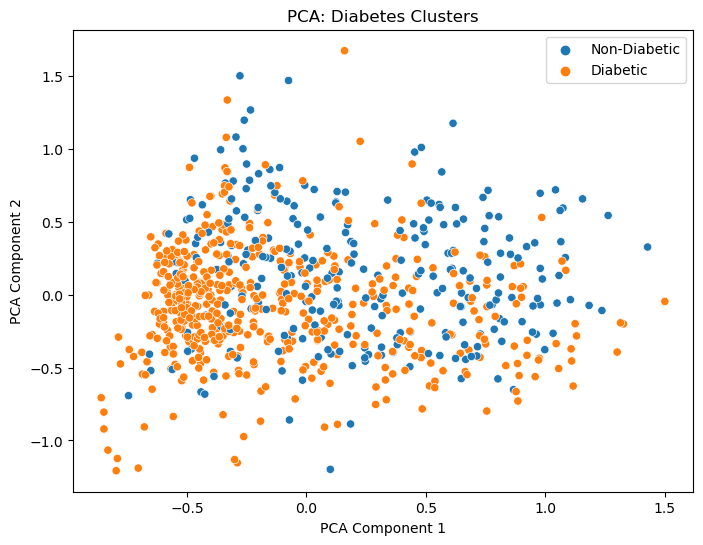

In [760]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Convert labels to interpretable categories for plotting
labels = np.where(y == 1, 'Diabetic', 'Non-Diabetic')

# --- PCA Visualization ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels)
plt.title('PCA: Diabetes Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Building From Scratch

In [677]:
X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [545]:
def plot_acc(test_accuracy,train_accuracy):
    plt.plot(test_accuracy, 'g', label = 'Test')
    plt.plot(train_accuracy, 'r', label = 'Train')

    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

def activation_function(z):
    # Step function
    return np.where(z >= 0, 1, -1)

def train(lr=0.01,epoch=500,random_weight=False, w_fixed=False):
    learning_rate = lr
    epochs = epoch
    accuracies = []
    test_accuracies = []

    num_samples, num_features = X_train.shape
    
    bias = 1

    if random_weight == False:
        weights = np.ones(num_features) # applyingg weight=0 for each features
    else:
        weights = np.random.rand(8)
        
    if w_fixed == True:
        weights = np.array([-0.40776972, -0.93946295,  0.32330359,  0.03940209, -0.32843995,
       -0.74344926, -0.07399001, -0.03150732])
        bias = -0.19999999999999996
        
    for _ in range(epochs):
        incorrect_pred = 0
        for idx, x in enumerate(X_train):
            linear_output = np.dot(x, weights) + bias
            y_pred = activation_function(linear_output) #if greater than 0 then 1 else 0/


            if y_train[idx] != y_pred:
                incorrect_pred+=1
                update = learning_rate * (y_train[idx] - y_pred)
                # w = w + learning_rate * (y - y_pred) * x
                # y - y_pred is the eroor
                weights += update * x
                bias += update
        acc = ((num_samples - incorrect_pred)/num_samples)*100
        accuracies.append(acc)
        
        linear_output_test = np.dot(X_test, weights) + bias
        y_pred_test = activation_function(linear_output_test)

        test_accuracies.append(np.mean(y_pred_test == y_test)*100)

        print(f"epoch {_ + 1} : Accuracy= {acc:.2f}")
        
    return weights,bias,accuracies,test_accuracies


***Learning rate 0.01 and 25 epochs***

In [551]:
#Training

weights,bias,test_accuracy,train_accuracy = train(0.01,25)

epoch 1 : Accuracy= 46.09
epoch 2 : Accuracy= 67.43
epoch 3 : Accuracy= 72.80
epoch 4 : Accuracy= 71.17
epoch 5 : Accuracy= 71.66
epoch 6 : Accuracy= 68.08
epoch 7 : Accuracy= 68.40
epoch 8 : Accuracy= 65.80
epoch 9 : Accuracy= 67.43
epoch 10 : Accuracy= 66.78
epoch 11 : Accuracy= 65.80
epoch 12 : Accuracy= 67.59
epoch 13 : Accuracy= 67.92
epoch 14 : Accuracy= 67.43
epoch 15 : Accuracy= 68.40
epoch 16 : Accuracy= 65.80
epoch 17 : Accuracy= 66.78
epoch 18 : Accuracy= 67.43
epoch 19 : Accuracy= 67.92
epoch 20 : Accuracy= 67.92
epoch 21 : Accuracy= 68.89
epoch 22 : Accuracy= 67.26
epoch 23 : Accuracy= 67.43
epoch 24 : Accuracy= 67.43
epoch 25 : Accuracy= 68.57


In [552]:
# Testing 

linear_output = np.dot(X_test, weights) + bias
y_pred = activation_function(linear_output)

accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 79.87%


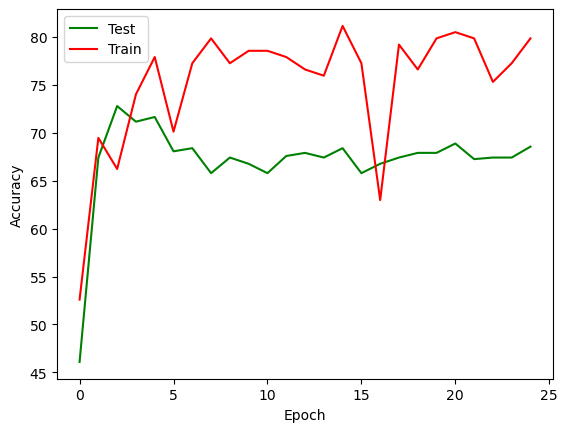

In [553]:
plot_acc(test_accuracy,train_accuracy)

***Learning rate 0.1 and 25 epochs***

In [554]:
#Training

weights,bias,test_accuracy,train_accuracy = train(0.1,25)

epoch 1 : Accuracy= 64.66
epoch 2 : Accuracy= 66.78
epoch 3 : Accuracy= 67.43
epoch 4 : Accuracy= 69.38
epoch 5 : Accuracy= 66.61
epoch 6 : Accuracy= 69.38
epoch 7 : Accuracy= 68.24
epoch 8 : Accuracy= 68.89
epoch 9 : Accuracy= 67.26
epoch 10 : Accuracy= 68.40
epoch 11 : Accuracy= 68.24
epoch 12 : Accuracy= 68.08
epoch 13 : Accuracy= 67.92
epoch 14 : Accuracy= 67.43
epoch 15 : Accuracy= 69.22
epoch 16 : Accuracy= 67.10
epoch 17 : Accuracy= 67.92
epoch 18 : Accuracy= 68.73
epoch 19 : Accuracy= 68.08
epoch 20 : Accuracy= 67.75
epoch 21 : Accuracy= 66.45
epoch 22 : Accuracy= 67.59
epoch 23 : Accuracy= 66.61
epoch 24 : Accuracy= 68.24
epoch 25 : Accuracy= 67.10


In [555]:
# Testing 

linear_output = np.dot(X_test, weights) + bias
y_pred = activation_function(linear_output)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 77.27%


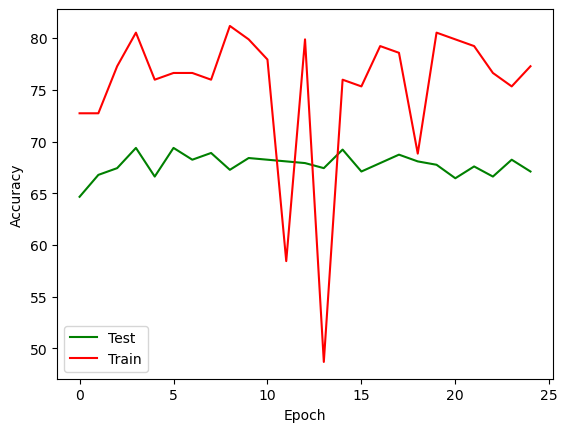

In [556]:
plot_acc(test_accuracy,train_accuracy)

***Learning rate 0.001 and 350 epochs***

In [599]:
#Training

weights,bias,test_accuracy,train_accuracy = train(0.001,350)

epoch 1 : Accuracy= 28.18
epoch 2 : Accuracy= 37.46
epoch 3 : Accuracy= 43.00
epoch 4 : Accuracy= 44.46
epoch 5 : Accuracy= 46.58
epoch 6 : Accuracy= 48.70
epoch 7 : Accuracy= 50.49
epoch 8 : Accuracy= 52.44
epoch 9 : Accuracy= 55.05
epoch 10 : Accuracy= 59.28
epoch 11 : Accuracy= 61.24
epoch 12 : Accuracy= 63.52
epoch 13 : Accuracy= 66.29
epoch 14 : Accuracy= 66.94
epoch 15 : Accuracy= 68.40
epoch 16 : Accuracy= 69.38
epoch 17 : Accuracy= 71.66
epoch 18 : Accuracy= 71.66
epoch 19 : Accuracy= 71.82
epoch 20 : Accuracy= 72.31
epoch 21 : Accuracy= 72.48
epoch 22 : Accuracy= 72.80
epoch 23 : Accuracy= 72.80
epoch 24 : Accuracy= 72.80
epoch 25 : Accuracy= 73.29
epoch 26 : Accuracy= 73.13
epoch 27 : Accuracy= 73.29
epoch 28 : Accuracy= 73.94
epoch 29 : Accuracy= 73.62
epoch 30 : Accuracy= 74.76
epoch 31 : Accuracy= 73.78
epoch 32 : Accuracy= 74.92
epoch 33 : Accuracy= 74.27
epoch 34 : Accuracy= 75.08
epoch 35 : Accuracy= 73.78
epoch 36 : Accuracy= 72.80
epoch 37 : Accuracy= 72.80
epoch 38 :

epoch 309 : Accuracy= 66.29
epoch 310 : Accuracy= 68.40
epoch 311 : Accuracy= 67.59
epoch 312 : Accuracy= 67.92
epoch 313 : Accuracy= 68.40
epoch 314 : Accuracy= 65.64
epoch 315 : Accuracy= 66.94
epoch 316 : Accuracy= 67.10
epoch 317 : Accuracy= 68.40
epoch 318 : Accuracy= 67.59
epoch 319 : Accuracy= 66.29
epoch 320 : Accuracy= 67.26
epoch 321 : Accuracy= 68.40
epoch 322 : Accuracy= 65.47
epoch 323 : Accuracy= 66.12
epoch 324 : Accuracy= 66.45
epoch 325 : Accuracy= 66.61
epoch 326 : Accuracy= 69.06
epoch 327 : Accuracy= 66.61
epoch 328 : Accuracy= 67.59
epoch 329 : Accuracy= 65.96
epoch 330 : Accuracy= 66.29
epoch 331 : Accuracy= 70.36
epoch 332 : Accuracy= 66.29
epoch 333 : Accuracy= 68.08
epoch 334 : Accuracy= 66.29
epoch 335 : Accuracy= 71.17
epoch 336 : Accuracy= 66.12
epoch 337 : Accuracy= 67.75
epoch 338 : Accuracy= 65.15
epoch 339 : Accuracy= 66.78
epoch 340 : Accuracy= 67.26
epoch 341 : Accuracy= 66.12
epoch 342 : Accuracy= 67.43
epoch 343 : Accuracy= 66.78
epoch 344 : Accuracy

In [600]:
linear_output = np.dot(X_test, weights) + bias
y_pred = activation_function(linear_output)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 77.92%


In [571]:
weights

array([-0.00411723, -0.00899436,  0.00098356, -0.00058677, -0.00162774,
       -0.00731755, -0.00069366, -0.00133378])

In [572]:
bias

-0.0020000000000008743

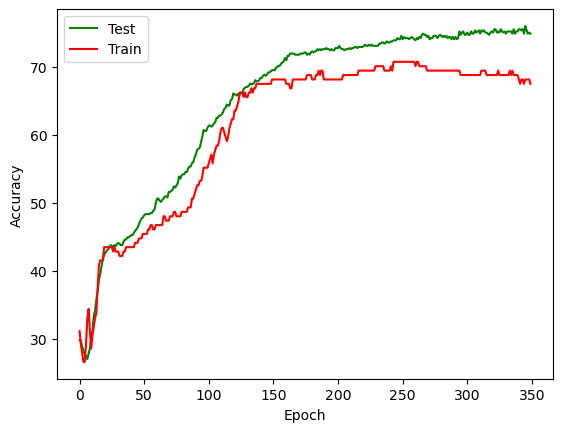

In [586]:
plot_acc(test_accuracy,train_accuracy)

***Learning rate 0.1 and 100 epochs random weights instead of ones***

In [644]:
#Training

weights,bias,test_accuracy,train_accuracy = train(0.01,25,True)

linear_output = np.dot(X_test, weights) + bias
y_pred = activation_function(linear_output)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

epoch 1 : Accuracy= 55.21
epoch 2 : Accuracy= 70.03
epoch 3 : Accuracy= 70.36
epoch 4 : Accuracy= 72.48
epoch 5 : Accuracy= 68.73
epoch 6 : Accuracy= 66.61
epoch 7 : Accuracy= 66.78
epoch 8 : Accuracy= 65.96
epoch 9 : Accuracy= 66.94
epoch 10 : Accuracy= 67.43
epoch 11 : Accuracy= 68.40
epoch 12 : Accuracy= 68.08
epoch 13 : Accuracy= 67.43
epoch 14 : Accuracy= 66.94
epoch 15 : Accuracy= 67.92
epoch 16 : Accuracy= 68.24
epoch 17 : Accuracy= 67.59
epoch 18 : Accuracy= 68.40
epoch 19 : Accuracy= 65.80
epoch 20 : Accuracy= 68.57
epoch 21 : Accuracy= 66.12
epoch 22 : Accuracy= 66.12
epoch 23 : Accuracy= 66.94
epoch 24 : Accuracy= 67.43
epoch 25 : Accuracy= 67.26
Accuracy: 79.87%


In [645]:
weights

array([-0.03342494, -0.07755644,  0.015132  ,  0.01698145, -0.02007599,
       -0.0636983 , -0.00549256, -0.00720832])

In [646]:
bias

-6.175615574477433e-16

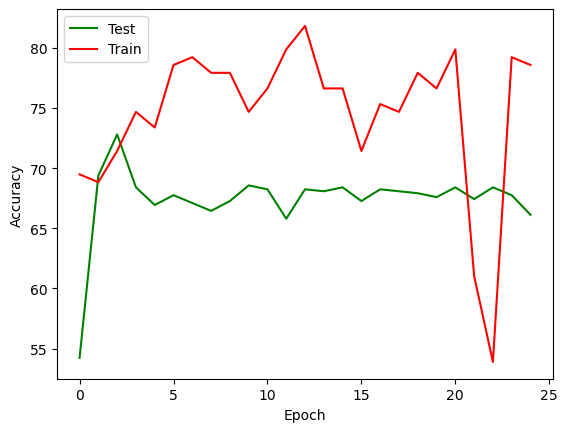

In [616]:
plot_acc(test_accuracy,train_accuracy)

***Accuracy using Best Weight***

In [643]:
weights = np.array([-0.40776972, -0.93946295,  0.32330359,  0.03940209, -0.32843995,
       -0.74344926, -0.07399001, -0.03150732])
bias = -0.19999999999999996

linear_output = np.dot(X_test, weights) + bias
y_pred = activation_function(linear_output)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 81.17%


# Changing Activation Function

In [652]:
def sigmoid(z):
    return np.where(1 / (1 + np.exp(-z)) >= 0.5, 1, -1)

def train_modified(lr=0.01,epoch=500):
    learning_rate = lr
    epochs = epoch
    accuracies = []
    test_accuracies = []
    best_acc = 0
    trail = 0

    num_samples, num_features = X_train.shape
    
#     weights = np.array([-0.40776972, -0.93946295,  0.32330359,  0.03940209, -0.32843995,
#    -0.74344926, -0.07399001, -0.03150732])
#     bias = -0.19999999999999996
    weights = np.ones(num_features)
    bias = 1
        
    for _ in range(epochs):
        incorrect_pred = 0
        for idx, x in enumerate(X_train):
            linear_output = np.dot(x, weights) + bias
            y_pred = sigmoid(linear_output) #if greater than 0 then 1 else 0/

            if y_train[idx] != y_pred:
                incorrect_pred+=1
                update = learning_rate * (y_train[idx] - y_pred)
                # w = w + learning_rate * (y - y_pred) * x
                # y - y_pred is the eroor
                weights += update * x
                bias += update
        acc = ((num_samples - incorrect_pred)/num_samples)*100
        accuracies.append(acc)
        
        linear_output_test = np.dot(X_test, weights) + bias
        y_pred_test = sigmoid(linear_output_test)

        test_accuracies.append(np.mean(y_pred_test == y_test)*100)
        
        if acc > best_acc:
            best_acc = acc
            trail = 0
        else:
            trail+=1

        print(f"epoch {_ + 1} : Accuracy= {acc:.2f}")
        
        if trail >=5:
            break
        
    return weights,bias,accuracies,test_accuracies


In [653]:
#Training

weights,bias,test_accuracy,train_accuracy = train_modified(0.001,100)

linear_output = np.dot(X_test, weights) + bias
y_pred = sigmoid(linear_output)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

epoch 1 : Accuracy= 28.18
epoch 2 : Accuracy= 37.46
epoch 3 : Accuracy= 43.00
epoch 4 : Accuracy= 44.46
epoch 5 : Accuracy= 46.58
epoch 6 : Accuracy= 48.70
epoch 7 : Accuracy= 50.49
epoch 8 : Accuracy= 52.44
epoch 9 : Accuracy= 55.05
epoch 10 : Accuracy= 59.28
epoch 11 : Accuracy= 61.24
epoch 12 : Accuracy= 63.52
epoch 13 : Accuracy= 66.29
epoch 14 : Accuracy= 66.94
epoch 15 : Accuracy= 68.40
epoch 16 : Accuracy= 69.38
epoch 17 : Accuracy= 71.66
epoch 18 : Accuracy= 71.66
epoch 19 : Accuracy= 71.82
epoch 20 : Accuracy= 72.31
epoch 21 : Accuracy= 72.48
epoch 22 : Accuracy= 72.80
epoch 23 : Accuracy= 72.80
epoch 24 : Accuracy= 72.80
epoch 25 : Accuracy= 73.29
epoch 26 : Accuracy= 73.13
epoch 27 : Accuracy= 73.29
epoch 28 : Accuracy= 73.94
epoch 29 : Accuracy= 73.62
epoch 30 : Accuracy= 74.76
epoch 31 : Accuracy= 73.78
epoch 32 : Accuracy= 74.92
epoch 33 : Accuracy= 74.27
epoch 34 : Accuracy= 75.08
epoch 35 : Accuracy= 73.78
epoch 36 : Accuracy= 72.80
epoch 37 : Accuracy= 72.80
epoch 38 :

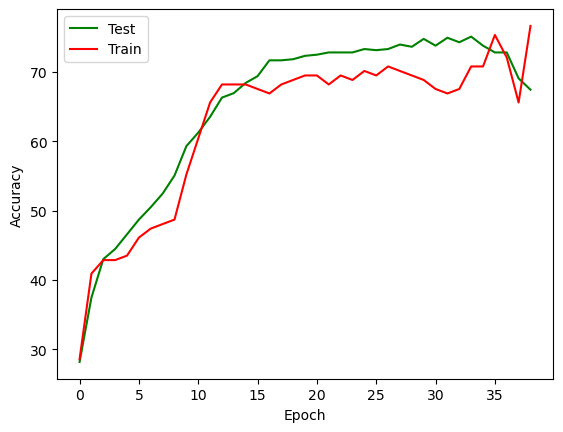

In [642]:
import matplotlib.pyplot as plt

plt.plot(test_accuracy, 'g', label = 'Test')
plt.plot(train_accuracy, 'r', label = 'Train')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***Sigmoid function using best weight and Bais***

In [654]:
#Training

weights = np.array([-0.40776972, -0.93946295,  0.32330359,  0.03940209, -0.32843995,
       -0.74344926, -0.07399001, -0.03150732])
bias = -0.19999999999999996

linear_output = np.dot(X_test, weights) + bias
y_pred = sigmoid(linear_output)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 81.17%


# Using Pytorch

In [717]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [725]:
# X_train = torch.from_numpy(X_train) 
# Y_train = torch.from_numpy(y_train)


In [812]:

class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_size, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        output = torch.sign(self.linear(x))
        #output = torch.relu(self.linear(hidden_output))
        return output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor((y_train+1)/2, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor((y_test+1)/2, dtype=torch.float32).view(-1, 1)

input_size = X_train_tensor.shape[1]
model = Perceptron(input_size)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

epochs = 1000
for epoch in range(epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

RuntimeError: all elements of input should be between 0 and 1

In [ ]:
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    y_test_pred_class = (y_test_pred >= 0.5).float() * 2 - 1  # Convert to {-1, 1} for comparison
    
    test_accuracy = (y_test_pred_class == y_test_tensor).float().mean()
    print(f'Test Accuracy: {test_accuracy.item() * 100:.2f}%')

# Step 5: Plot the training loss curve
plt.plot(train_losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [795]:
with torch.no_grad():
    # Predictions on the test set
    test_outputs = model(X_test_tensor)
    predictions = binary_activation(test_outputs)
    
    # Accuracy
    accuracy = (predictions == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 51.30%


# MLP

In [778]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Multi-Layer Perceptron Model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Input layer to hidden layer
        self.relu = nn.ReLU()                         # ReLU activation
        self.fc2 = nn.Linear(hidden_size, 1)          # Hidden layer to output layer
    
    def forward(self, x):
        hidden_output = self.relu(self.fc1(x))        # Hidden layer + ReLU
        output = torch.sigmoid(self.fc2(hidden_output))  # Output layer + Sigmoid for binary classification
        return output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

input_size = X_train_tensor.shape[1]
hidden_size = 10
model = MLP(input_size, hidden_size)

criterion = nn.BCELoss()# Binary Cross Entropy Loss

optimizer = optim.SGD(model.parameters(), lr=1)

epochs = 10000
train_losses = []

In [779]:
for epoch in range(epochs):
    y_pred = model(X_train_tensor)
    
    # Compute the loss
    loss = criterion(y_pred, (y_train_tensor + 1) / 2)  #{-1, 1} to {0, 1} for BCELoss
    
    # Zero gradients, perform backward pass, and update the weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())  # Store the loss for visualization

    if (epoch + 1) % 100 == 0:
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}')

Epoch 100/10000, Loss: 0.4679
Epoch 200/10000, Loss: 0.4383
Epoch 300/10000, Loss: 0.4355
Epoch 400/10000, Loss: 0.4283
Epoch 500/10000, Loss: 0.4314
Epoch 600/10000, Loss: 0.4277
Epoch 700/10000, Loss: 0.4262
Epoch 800/10000, Loss: 0.4261
Epoch 900/10000, Loss: 0.4193
Epoch 1000/10000, Loss: 0.4183
Epoch 1100/10000, Loss: 0.4137
Epoch 1200/10000, Loss: 0.4055
Epoch 1300/10000, Loss: 0.4090
Epoch 1400/10000, Loss: 0.4082
Epoch 1500/10000, Loss: 0.4074
Epoch 1600/10000, Loss: 0.3981
Epoch 1700/10000, Loss: 0.4029
Epoch 1800/10000, Loss: 0.4011
Epoch 1900/10000, Loss: 0.3934
Epoch 2000/10000, Loss: 0.3905
Epoch 2100/10000, Loss: 0.3966
Epoch 2200/10000, Loss: 0.3940
Epoch 2300/10000, Loss: 0.3938
Epoch 2400/10000, Loss: 0.3931
Epoch 2500/10000, Loss: 0.3906
Epoch 2600/10000, Loss: 0.3917
Epoch 2700/10000, Loss: 0.3909
Epoch 2800/10000, Loss: 0.3901
Epoch 2900/10000, Loss: 0.3863
Epoch 3000/10000, Loss: 0.3855
Epoch 3100/10000, Loss: 0.3911
Epoch 3200/10000, Loss: 0.3902
Epoch 3300/10000,

Test Accuracy: 74.68%


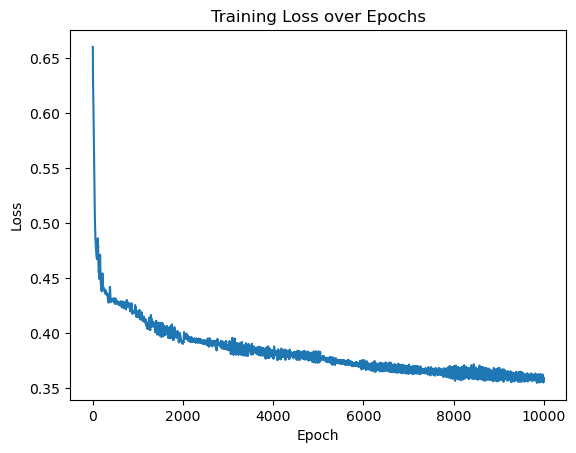

In [780]:
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    y_test_pred_class = (y_test_pred >= 0.5).float() * 2 - 1  # Convert to {-1, 1} for comparison
    
    test_accuracy = (y_test_pred_class == y_test_tensor).float().mean()
    print(f'Test Accuracy: {test_accuracy.item() * 100:.2f}%')

# Step 5: Plot the training loss curve
plt.plot(train_losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()